In [7]:
import pandas as pd

# Load the datasets
sirs_file_path = '../data/Dartmouth Data Set- SIRS .xlsx'
feis_file_path = '../data/Dartmouth FEIS Data.xlsx'

sirs_data = pd.read_excel(sirs_file_path)
feis_data = pd.read_excel(feis_file_path)

# Renaming the column in FEIS dataset to match the SIRS dataset for merging
feis_data.rename(columns={'Respondent ID #  (SIRS Local ID)': 'Local ID'}, inplace=True)

# Merging the datasets on 'Local ID'
merged_data = pd.merge(sirs_data, feis_data, on='Local ID', how='inner')

In [8]:
merged_data

,Local ID,Date Enrolled in START,Status,Status Date,Time Enrolled in START,Source of referral to START,Suitability of enrollment in START,Individual/Caregiver reliable access to technology,Presenting problems at time of enrollment,Services at Enrollment,...,"In\nthe past year, did your family member use in-patient psychiatric services?","If\nyes, were the inpatient services that your family member received helpful to\nhim/her in your opinion? ?",How\nmuch help was available to you at night or on weekends if your family member\nhad a crisis?,Are\nthere options outside of the hospital for individuals experiencing a crisis to\ngo for help (i.e. crisis/hospital diversion beds)?,Who\nwas the primary source of information about your family memberâ€™s mental health\nservices?,"If other, please describe..2","During the past year, how much involvement\ndid you want to have in your family memberâ€™s treatment plan?",Was there any particular service that your\nfamily member needed that was not available?,"If yes, please describe the service.",What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?
0,321686,2015-09-01,Active,2015-09-30,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,No,NaN,Very little,None at all,Your family member him/herself,NaN,A lot,No,NaN,NaN
1,379503C,2016-01-01,Active,2016-01-28,Business Hours (Monday - Friday 8am - 5pm),Other: Managed Care Organization,Appropriate,NaN,"Aggression (physical, verbal, property destruc...",NaN,...,Yes,None at all,None at all,None at all,Other,Hospital psychiatrist,A lot,Yes,Therapeutic/ABA/In home help/ Male Mentorship ...,To understnad the frustration of families who ...
2,401268C,2016-03-01,Active,2016-03-03,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,Self-injurious,Enhanced staffing (1:1 or 2:1 staff),...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,382885,2016-07-01,Active,2016-07-11,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Case management/service coordination, Mental h...",...,No,Did not know/answer,None at all,"Some, but not as much as was needed/wanted",His/her psychiatrist,NaN,A lot,Yes,Crisis services,NaN
4,322773,2016-09-01,Active,2016-09-09,Business Hours (Monday - Friday 8am - 5pm),Other: OPWDD,Appropriate,NaN,"Aggression (physical, verbal, property destruc...","Case management/service coordination, Mental h...",...,No,None at all,None at all,None at all,His/her psychiatrist,NaN,A lot,Yes,Ivan has no insurance and no services. He nee...,It is hard. No one helps you. You have to ke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,8093984,2020-12-01,Inactive (stable functioning),2021-12-08,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,"Laptop/desktop, Telephone landline","Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,Yes,"Some, but not as much as was needed/wanted",Very little,Very little,Your family member him/herself,NaN,A lot,Yes,Not sure what is missing,NaN
1093,6264999,2020-08-01,Inactive (no longer requesting services),2021-12-09,Business Hours (Monday - Friday 8am - 5pm),Case Manager/Service Coordinator,Appropriate,"Cell phone service, Smartphone","Aggression (physical, verbal, property destruc...","Behavioral support services, Case management/s...",...,Yes,"Some, but not as much as was needed/wanted",Very little,None at all,Your family member him/herself,NaN,Very little,No,NaN,NaN
1094,8191483,2020-02-01,Inactive (no longer requesting services),2021-12-09,Business Hours (Monday - Friday 8am - 5pm),Family member,Appropriate,NaN,"Aggression (physical, v

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/orenpoleshuckkinel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topics identified in all responses:
Topic 1: family providers members individual care
Topic 2: therapy speech therapist follow placement
Topic 3: respite behavior therapy crisis counseling
Topic 4: home respite community program habilitation
Topic 5: therapy residential family available options
Topic 6: none information family respite families
Topic 7: crisis support home respite behavior
Topic 8: respite hab crisis providers care
Topic 9: get idd aba crisis answer
Topic 10: available care needed providers service

Percent of responses in each topic before COVID-19:
Topic 1: 35.92%
Topic 2: 3.16%
Topic 3: 8.05%
Topic 4: 11.49%
Topic 5: 8.62%
Topic 6: 6.90%
Topic 7: 6.61%
Topic 8: 8.91%
Topic 9: 7.47%
Topic 10: 2.87%

Percent of responses in each topic after COVID-19:
Topic 1: 31.93%
Topic 2: 4.66%
Topic 3: 5.32%
Topic 4: 8.43%
Topic 5: 11.75%
Topic 6: 5.54%
Topic 7: 10.86%
Topic 8: 10.42%
Topic 9: 7.10%
Topic 10: 3.99%


/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_84651/896572850.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid_df['topic'] = df.loc[before_covid_df.index, 'topic']
/var/folders/ss/3094bd1s7k55hnfygclmswz00000gn/T/ipykernel_84651/896572850.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_covid_df['topic'] = df.loc[after_covid_df.index, 'topic']


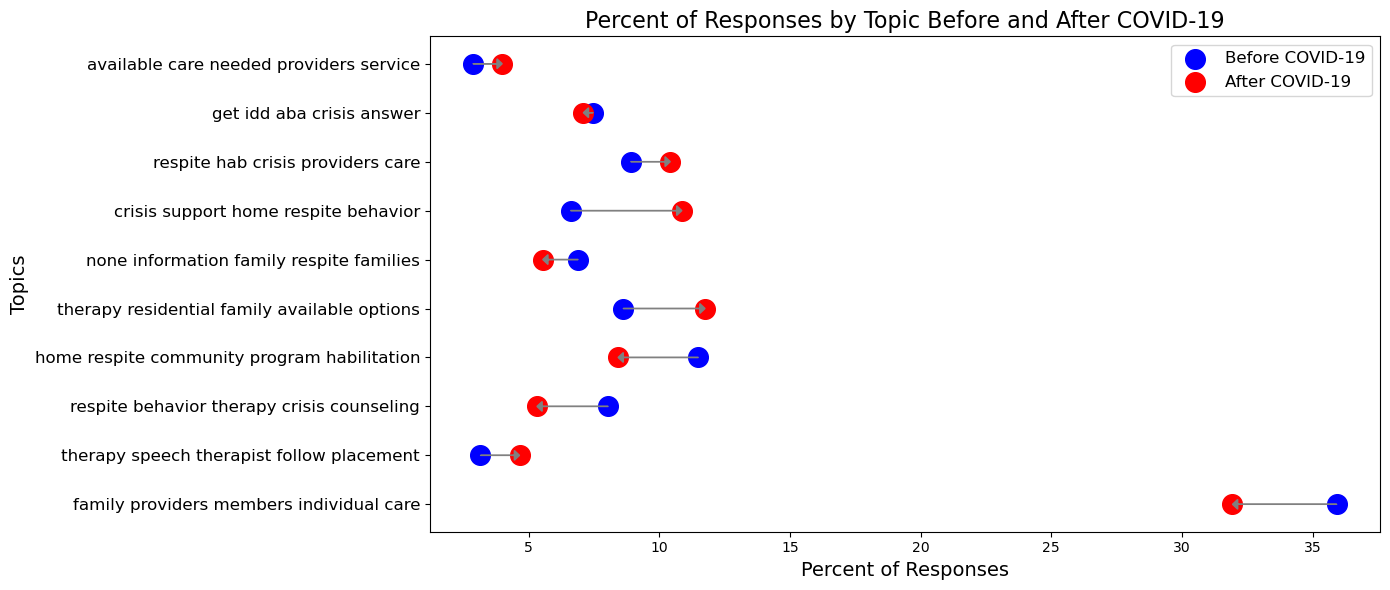

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

# Load the dataset
file_path = '../data/Dartmouth FEIS Data.xlsx'
df = pd.read_excel(file_path, sheet_name='Cohort')

# Extract relevant text columns
text_columns = [
    'If yes, please describe the service.',
    'What\nadvice would you give to service planners regarding the mental health service\nneeds of persons with IDD and their families?'
]
date_column = 'End Date'

# Ensure the Date column is in datetime format
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Define the COVID-19 start date and the one year period before it
covid_start_date = pd.Timestamp('2020-03-13')
one_year_before_covid = covid_start_date - pd.DateOffset(years=1)

# Filter the dataset for the one year before COVID-19
before_covid_df = df[(df[date_column] >= one_year_before_covid) & (df[date_column] < covid_start_date)]
after_covid_df = df[df[date_column] >= covid_start_date]

# Combine the text columns into a single text corpus
df['combined_text'] = df[text_columns].fillna('').astype(str).apply(lambda row: ' '.join(row), axis=1)

# Preprocess the text data and apply LDA to all responses
nltk.download('stopwords')
custom_stopwords = ['services', 'need', 'help', 'know', 'would', 'many', 'needs']
stop_words = list(set(stopwords.words('english'))) + custom_stopwords
vectorizer = CountVectorizer(stop_words=stop_words)
text_matrix = vectorizer.fit_transform(df['combined_text'])

# Apply LDA for topic modeling
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=69)
lda.fit(text_matrix)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(' '.join(topic_words))
    return topics

feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda, feature_names, 5)  # Display top 3 words per topic

# Get topic distribution for each document
topic_distribution = lda.transform(text_matrix)

# Assign each document to the most probable topic
df['topic'] = np.argmax(topic_distribution, axis=1)

# Count the number of cases in each topic before and after COVID
before_covid_df['topic'] = df.loc[before_covid_df.index, 'topic']
after_covid_df['topic'] = df.loc[after_covid_df.index, 'topic']

before_covid_topic_counts = before_covid_df['topic'].value_counts().reindex(range(n_topics), fill_value=0)
after_covid_topic_counts = after_covid_df['topic'].value_counts().reindex(range(n_topics), fill_value=0)

# Calculate proportions and convert to percentages
before_covid_percentages = (before_covid_topic_counts / before_covid_df.shape[0]) * 100
after_covid_percentages = (after_covid_topic_counts / after_covid_df.shape[0]) * 100

# Display the topics and their counts for both subsets
print("Topics identified in all responses:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {topic}")

print("\nPercent of responses in each topic before COVID-19:")
for idx in range(n_topics):
    print(f"Topic {idx+1}: {before_covid_percentages[idx]:.2f}%")

print("\nPercent of responses in each topic after COVID-19:")
for idx in range(n_topics):
    print(f"Topic {idx+1}: {after_covid_percentages[idx]:.2f}%")

# Plot the change in the percent of responses that fall into each category pre- and post-COVID
labels = topics  # Use the topics as labels
y = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(14, 6))

# Scatter plot for before COVID-19 percentages
ax.scatter(before_covid_percentages, y, color='blue', label='Before COVID-19', s=200)  # Increased size of dots

# Scatter plot for after COVID-19 percentages
ax.scatter(after_covid_percentages, y, color='red', label='After COVID-19', s=200)  # Increased size of dots

# Add arrows to show the direction of change
for i in range(len(y)):
    if after_covid_percentages[i] < before_covid_percentages[i]:
        adjust_dx = 0.2
    else:
        adjust_dx = -0.2
    dx = after_covid_percentages[i] - before_covid_percentages[i] + adjust_dx
    ax.arrow(before_covid_percentages[i], y[i], dx, 0, 
             head_width=0.2, head_length=0.2, 
             fc='gray', ec='gray')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Topics', fontsize=14)  # Increased font size
ax.set_xlabel('Percent of Responses', fontsize=14)  # Increased font size
ax.set_title('Percent of Responses by Topic Before and After COVID-19', fontsize=16)  # Increased font size
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12)  # Increased font size
ax.legend(fontsize=12)  # Increased font size

fig.tight_layout()

plt.savefig('percent_responses_topic_pre_post_covid.png')

plt.show()
